## Homework lecture 4:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

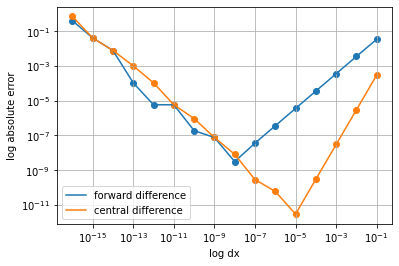

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

def derfw(y, x, dx): 
    return (y(x+dx)-y(x))/dx

def dercd(y, x, dx):
    return (y(x+dx/2)-y(x-dx/2))/dx

dx = 10.**np.arange(-16, 0)

fpri1 = derfw(np.cos, np.pi/4, dx)

fpri2 = dercd(np.cos, np.pi/4, dx)

## with x = pi/4

plt.scatter(dx, np.abs(fpri1 + np.sin(np.pi/4)) ) 
plt.scatter(dx, np.abs(fpri2 + np.sin(np.pi/4)))

plt.plot(dx, np.abs(fpri1 + np.sin(np.pi/4)), label = 'forward difference') 
plt.plot(dx, np.abs(fpri2 + np.sin(np.pi/4)), label = 'central difference')

plt.ylabel('log absolute error')
plt.xlabel('log dx')

plt.yscale('log')
plt.xscale('log')

plt.grid()
plt.legend()

The error is proportional to ~$dx^n$. For forward difference, $n$ ~ 1, and the optimal $dx$ is ~ $10^{-8}$. For central difference, $n$ ~ 2, and the optimal $dx$ is ~ $10^{-5}$.

The central difference scheme is better because we can achieve a lower error with the right choice of dx. 

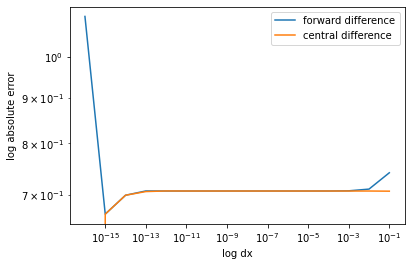

In [7]:
## with x = 0
plt.plot(dx, np.abs(fpri1 + np.sin(0)), label = 'forward difference') 
plt.plot(dx, np.abs(fpri2 + np.sin(0)), label = 'central difference')

plt.ylabel('log absolute error')
plt.xlabel('log dx')

plt.yscale('log')
#plt.yticks([0.2e1, 1e0, 1e-1, 1e-2])
plt.xscale('log')
plt.legend()

Evaluating the derivatives at $x=0$ gives a different result.

The error for the forward difference scheme is: $O(h) = \frac{h}{2!}*y''(t)+\frac{h^2}{3!}*y'''(t)...$ For $y = cos(x)$, the error is $-\frac{h}{2!}*cos(x)$. The error evaluated at $x = \pi/4$ is $- \frac{h}{2!\sqrt{2}}$, or at $x = 0$ is $- \frac{h}{2!}$. 

In comparison, the error for the central difference is $O(h^4)=-\frac{h^4}{64*120}*y^{(5)}(x)...$  Or for $y = cos(x)$, the error is $\frac{h^4}{64*120}*sin(x)$. The error evaluated at $x = \pi/4$ is $\frac{h^4}{64*120*\sqrt{2}}$ , or at $x = 0$ is $0$.

The results are different because the leading term of the error have different equations. At different values of x, the error terms have different values. 